# Credit Card Default: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Loading and transformations

In [2]:
# Loading the dataset
DATA_DIR = '../data'
FILE_NAME = 'credit_card_default.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
ccd = pd.read_csv(data_path, index_col="ID")
ccd.rename(columns=lambda x: x.lower(), inplace=True)
ccd.rename(columns={'default payment next month':'default'}, inplace=True)

# getting the groups of features
bill_amt_features = ['bill_amt'+ str(i) for i in range(1,7)]
pay_amt_features = ['pay_amt'+ str(i) for i in range(1,7)]
numerical_features = ['limit_bal','age'] + bill_amt_features + pay_amt_features

# creating binary features
ccd['male'] = (ccd['sex'] == 1).astype('int')
ccd['grad_school'] = (ccd['education'] == 1).astype('int')
ccd['university'] = (ccd['education'] == 2).astype('int')
ccd['high_school'] = (ccd['education'] == 3).astype('int')
ccd['married'] = (ccd['marriage'] == 1).astype('int')

pay_features= ['pay_' + str(i) for i in range(1,7)]
for x in pay_features:
    ccd.loc[ccd[x] <= 0, x] = 0

delayed_features = ['delayed_' + str(i) for i in range(1,7)]
for pay, delayed in zip(pay_features, delayed_features):
    ccd[delayed] = (ccd[pay] > 0).astype(int)
    
ccd['months_delayed'] = ccd[delayed_features].sum(axis=1)

## Multivariate EDA

In [52]:
sample_eda = ccd.sample(n=1000)

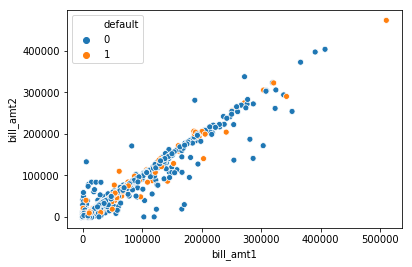

In [62]:
sns.scatterplot(x='bill_amt1', y='bill_amt2', hue='default', data=sample_eda);

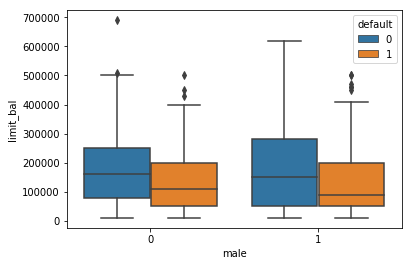

In [56]:
sns.boxplot(x='male', y='limit_bal', hue='default', data=sample_eda);

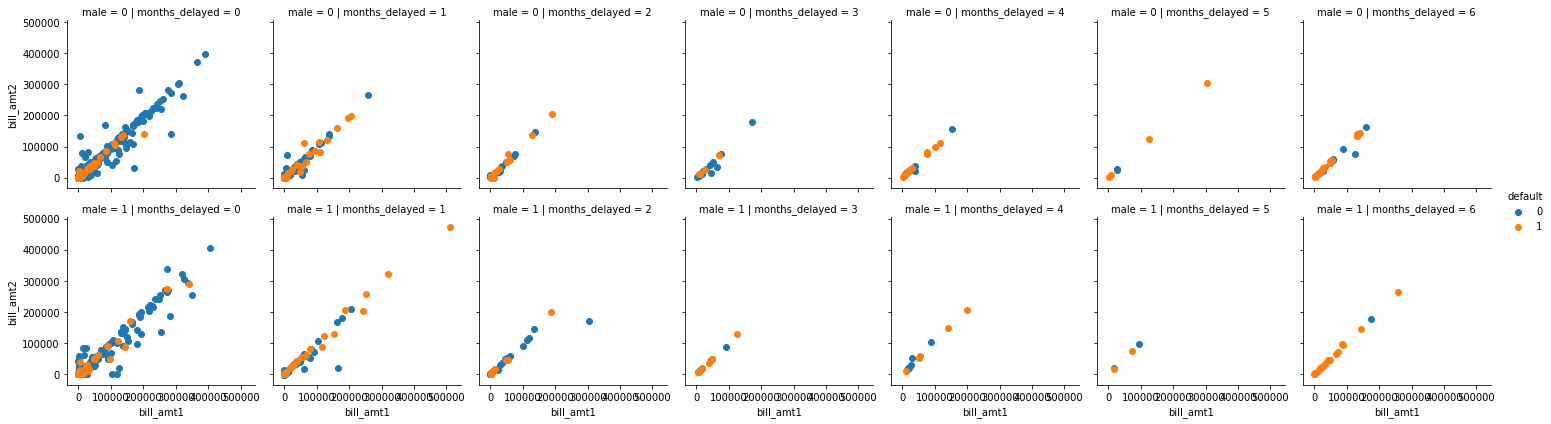

In [65]:
# create the FacetGrid instance
p = sns.FacetGrid(sample_eda, col="months_delayed", row='male', hue='default')
# choose the graph to display in each subplot
p.map(plt.scatter, 'bill_amt1', 'bill_amt2')
p.add_legend();

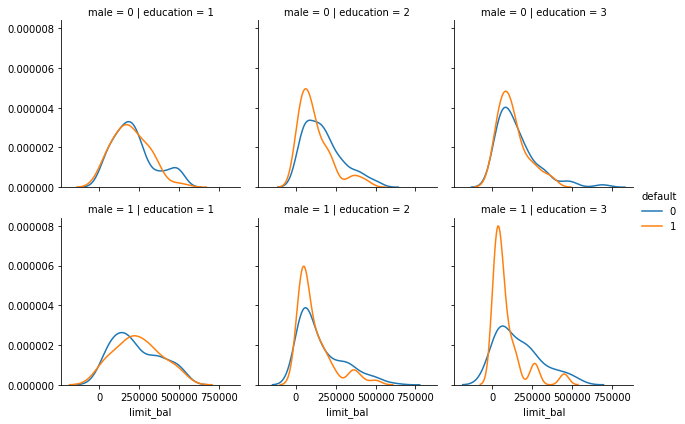

In [71]:
edu_levels123 = sample_eda.loc[sample_eda['education'].isin([1,2,3])]
p = sns.FacetGrid(edu_levels123, row='male', col='education', hue='default')
p.map(sns.distplot, "limit_bal", hist=False)
p.add_legend();

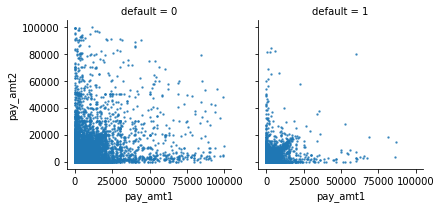

In [43]:
g = sns.FacetGrid(ccd.loc[pay_amt_filter], col="default")
g.map(plt.scatter, 'pay_amt1', 'pay_amt2', alpha=.7, s=2)
g.add_legend();